In [59]:
import joblib
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..')))
from steps.ingest_data import ingest_data
from steps.clean_data import clean_data
from steps.model_train import train_model, save_model
from steps.evaluation import evaluate_model


In [60]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import xgboost as xgb

In [61]:
path_nb = "C:/Users/rober/OneDrive/Escriptori/DataSets/xgboost-calibration/XGBoost-and-Model-Calibration/"
xgb_model = joblib.load(f"{path_nb}saved_models/xgb_model.joblib")

In [62]:
# get params from model
churn_data = ingest_data(data_path=f"{path_nb}data/Churn_Modelling.csv")
X_train, X_test, y_train, y_test = clean_data(churn_data)
params = xgb_model.get_params()

In [63]:
predictions = xgb_model.predict_proba(X_test)
prob_pos = predictions[:, 1]

In [64]:
pos_fraction, avg_predict_prob = calibration_curve(y_test, prob_pos, n_bins=20)

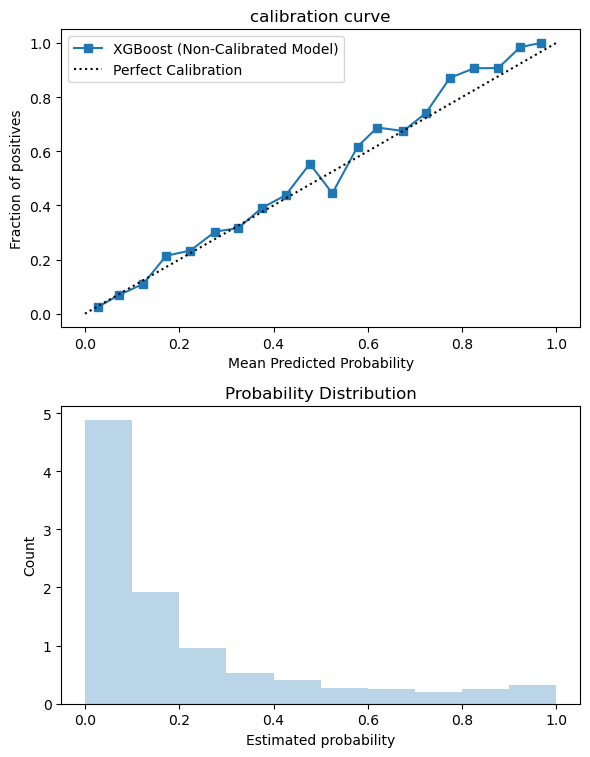

In [65]:
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(6, 2*3.84))

axs[0].plot(avg_predict_prob, pos_fraction, "s-", label="XGBoost (Non-Calibrated Model)")
axs[0].plot([0, 1], [0, 1], "k:", label="Perfect Calibration")
axs[0].set_ylabel("Fraction of positives")
axs[0].set_xlabel("Mean Predicted Probability")
axs[0].set_title('calibration curve')
axs[0].legend()

axs[1].hist(prob_pos, range=(0, 1), bins=10, density=True, lw=2, alpha = 0.3)
axs[1].set_xlabel("Estimated probability")
axs[1].set_ylabel("Count")
axs[1].set_title('Probability Distribution')

plt.tight_layout()
plt.show()

## Calibration

In [66]:

xgb_model_cal = xgb.XGBClassifier()
xgb_model_cal.set_params(**params)

# Calibrate the model using isotonic regression
cal_model = CalibratedClassifierCV(xgb_model_cal, cv=3, method='isotonic')
cal_model.fit(X_train.to_numpy(), y_train.to_numpy())

# Print a message indicating successful fitting
print("Model fitted successfully.")

Model fitted successfully.


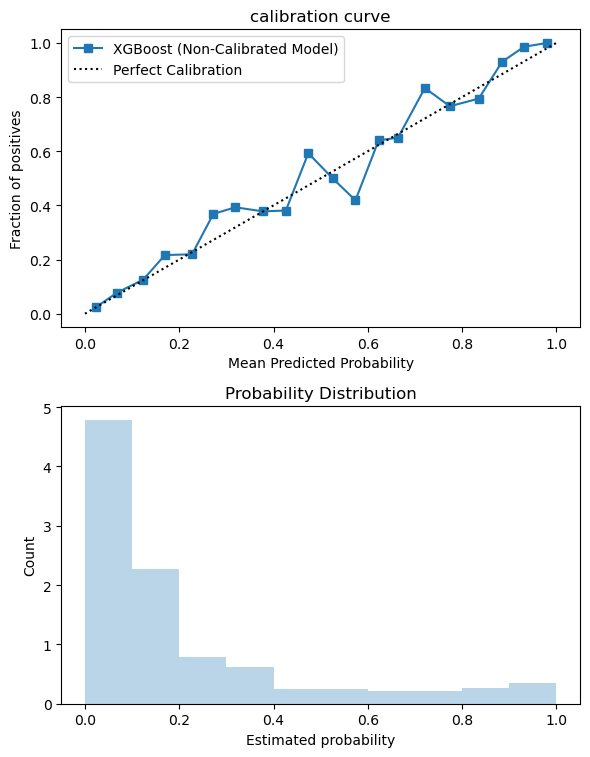

In [67]:
predictions = cal_model.predict_proba(X_test)
prob_pos = predictions[:, 1]
pos_fraction, avg_predict_prob = calibration_curve(y_test, prob_pos, n_bins=20)
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(6, 2*3.84))

axs[0].plot(avg_predict_prob, pos_fraction, "s-", label="XGBoost (Non-Calibrated Model)")
axs[0].plot([0, 1], [0, 1], "k:", label="Perfect Calibration")
axs[0].set_ylabel("Fraction of positives")
axs[0].set_xlabel("Mean Predicted Probability")
axs[0].set_title('calibration curve')
axs[0].legend()

axs[1].hist(prob_pos, range=(0, 1), bins=10, density=True, lw=2, alpha = 0.3)
axs[1].set_xlabel("Estimated probability")
axs[1].set_ylabel("Count")
axs[1].set_title('Probability Distribution')

plt.tight_layout()
plt.show()